In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df = pd.read_csv('/kaggle/input/egiihkj/intern_task.csv')

In [35]:
df.head()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000


Для начала поймем, какие признаки сразу можно выбросить, так как они одинаковы у всех пользователей

In [36]:
for i in df.columns:
    size = len(df[i].unique())
    if size<5:
        print (i, size)
        print(df[i].value_counts())

feature_64 1
feature_64
0    235258
Name: count, dtype: int64
feature_65 1
feature_65
0    235258
Name: count, dtype: int64
feature_72 1
feature_72
1    235258
Name: count, dtype: int64
feature_95 2
feature_95
1.0    164660
0.0     70598
Name: count, dtype: int64
feature_96 2
feature_96
0.0    220724
1.0     14534
Name: count, dtype: int64
feature_97 2
feature_97
0.0    145109
1.0     90149
Name: count, dtype: int64
feature_98 2
feature_98
0.0    191748
1.0     43510
Name: count, dtype: int64
feature_99 2
feature_99
1.0    172455
0.0     62803
Name: count, dtype: int64
feature_100 1
feature_100
0    235258
Name: count, dtype: int64


Признаки, в которых у всех пользователей один показатель не будут полезны для дальнейшего предсказания, а в которых 2 различных показателя имеют дисбаланс классов

In [37]:
df = df.drop(['feature_64','feature_65', 'feature_72', 'feature_100' ], axis = 1)

In [38]:
df.describe()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,...,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,...,1.954840e+04,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8215.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000
50%,0.000000,14935.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000
75%,1.000000,21580.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000e+00,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000
max,4.000000,29995.000000,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,...,1.731553e+06,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000


Явный дисбаланс

<Axes: >

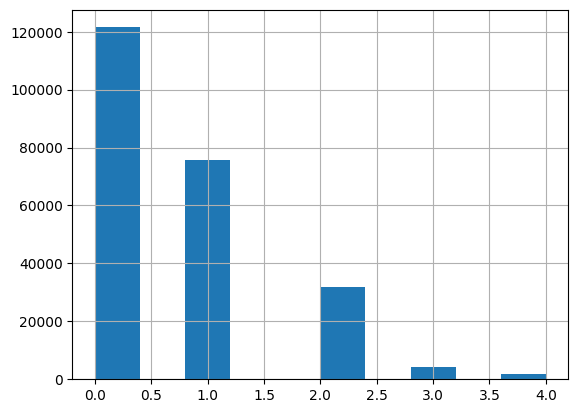

In [39]:
df['rank'].hist()

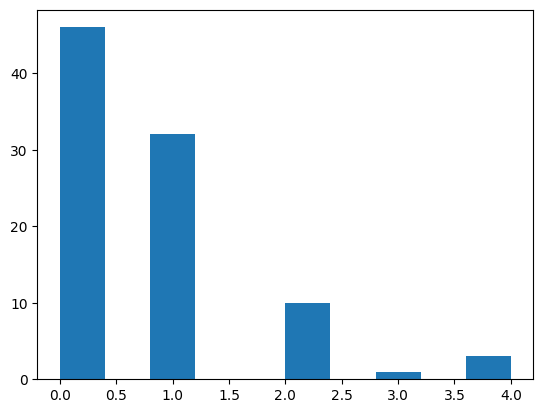

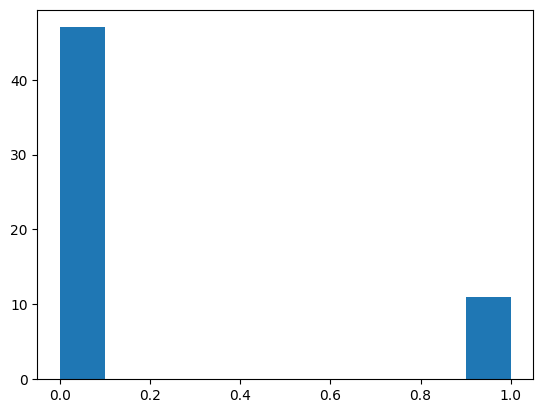

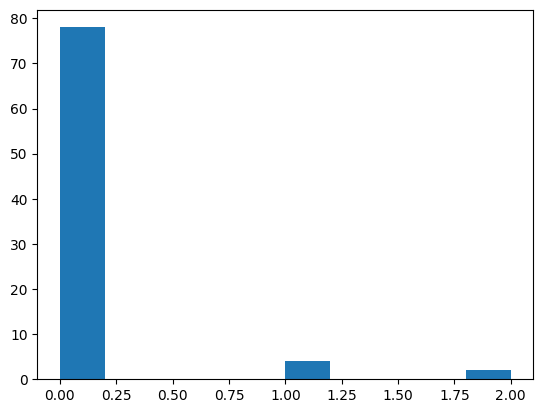

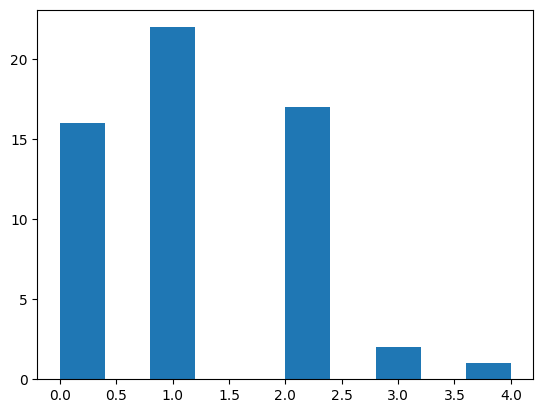

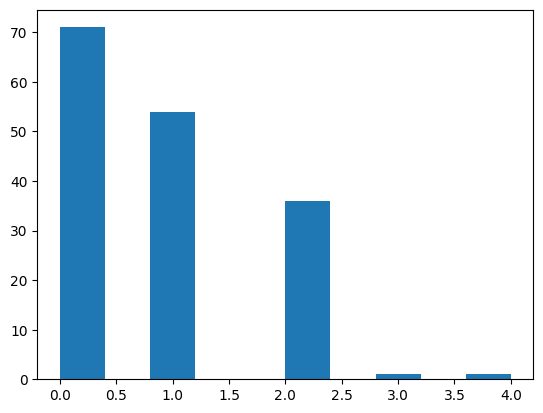

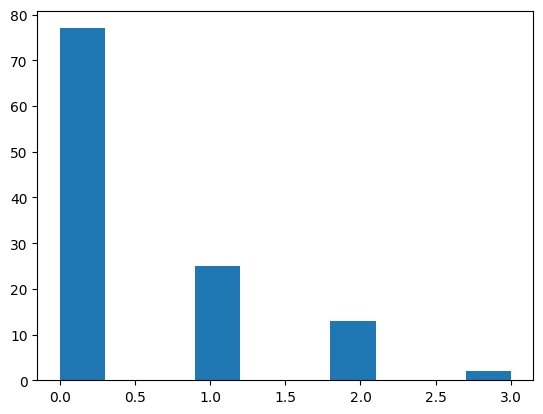

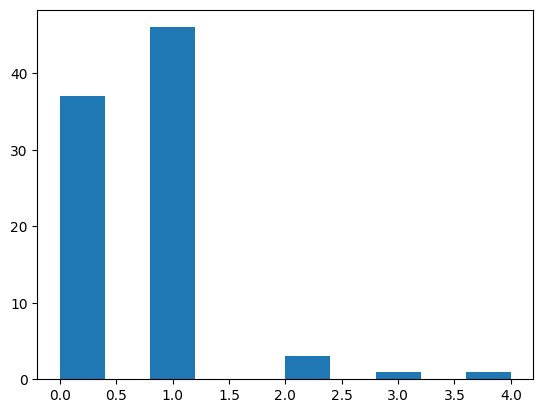

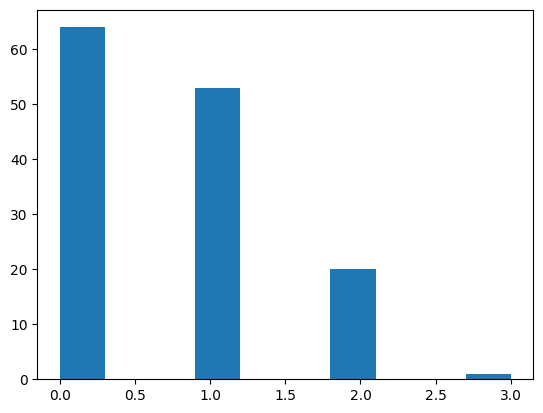

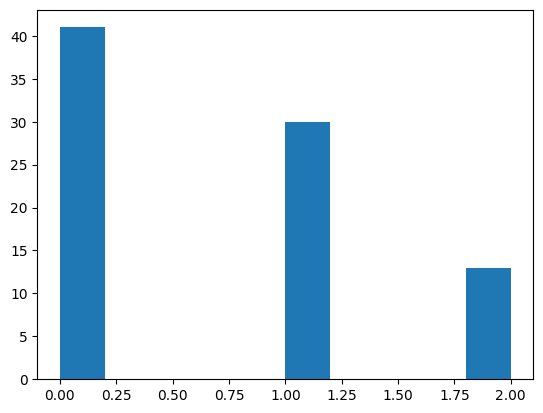

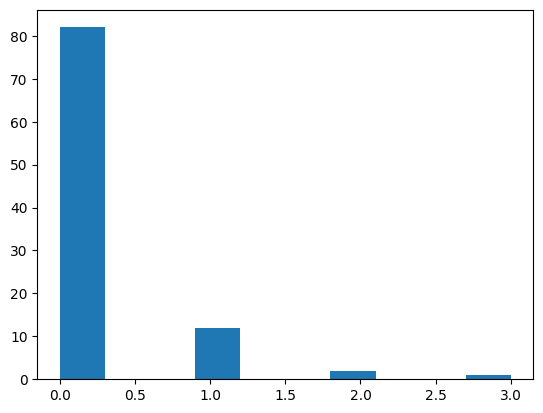

In [40]:
for i in df.groupby('query_id')['rank'].apply(list)[:10]:
    plt.hist(i)
    plt.show()

Матрица очень разреженная, с такими данными будет неудобно работать, так как они требуют большой объем памяти. Поэтому следует уменьшить её размерность. Для этого используется метод снижения размерности TruncatedSVD для уменьшения размерности данных до 10 компонентов.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
from numpy import count_nonzero

feutures = df.drop(['rank','query_id'], axis  =1)
print(feutures.shape)
 
X = StandardScaler().fit_transform(feutures)

X_sparse = csr_matrix(X)
tsvd = TruncatedSVD(n_components=10)

X_sparse_tsvd = tsvd.fit(X_sparse).transform(X_sparse)
print(X_sparse_tsvd.shape)

(235258, 140)
(235258, 10)


Далее в качестве бейслайна возьмем линейную модель и обучим ее на преобразованных данных

In [100]:
data = pd.DataFrame(X_sparse_tsvd)
data['rank'] = df['rank']
data['query_id']= df['query_id']
data.describe()

,0,1,2,3,4,5,6,7,8,9,rank,query_id
count,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,235258.000000,235258.000000
mean,-4.155892e-16,9.664865e-17,1.797665e-16,2.512865e-17,-2.938119e-16,-9.229946e-17,-1.483557e-16,1.440065e-16,-7.345297e-17,-7.731892e-18,0.677869,14828.413401
std,5.005912e+00,4.224040e+00,3.305889e+00,3.266353e+00,2.879029e+00,2.320168e+00,2.204232e+00,2.047678e+00,1.876519e+00,1.867631e+00,0.830033,8193.945170
min,-4.424094e+01,-8.615021e+00,-8.259528e+01,-4.405161e+01,-6.631114e+01,-4.264070e+01,-2.137713e+01,-1.230848e+02,-7.953461e+01,-1.893535e+01,0.000000,10.000000
25%,-3.574000e+00,-2.657984e+00,-2.088221e+00,-1.850860e+00,-1.581484e+00,-1.297016e+00,-1.035622e+00,-7.938354e-01,-8.367392e-01,-3.637866e-01,0.000000,8215.000000
50%,-4.202535e-01,-2.952731e-01,-3.193540e-02,-2.793491e-01,-1.751441e-01,-2.438405e-01,-5.107175e-02,2.363483e-01,8.713991e-02,1.880474e-01,0.000000,14935.000000
75%,2.877383e+00,2.248758e+00,2.151703e+00,1.189009e+00,1.448399e+00,1.002487e+00,9.614798e-01,1.129491e+00,9.971476e-01,5.976960e-01,1.000000,21580.000000
max,9.058625e+01,3.389113e+02,1.516717e+02,2.380487e+02,3.765047e+02,6.798792e+01,3.223878e+02,1.307828e+02,2.591529e+02,4.156281e+02,4.000000,29995.000000


In [58]:
from sklearn.model_selection import train_test_split

X = data.drop(['rank','query_id'], axis = 1)
y = data['rank']


In [62]:
from sklearn import linear_model

model = linear_model.Lasso()
model.fit(X, y)

Lasso()

In [63]:
df['query_id'].value_counts()

query_id
22540    908
13930    773
22450    522
19945    444
9940     430
        ... 
22780      2
14350      2
9265       1
20560      1
28285      1
Name: count, Length: 2000, dtype: int64

In [66]:
y_true = data[data['query_id'] == 22540]['rank']
y_pred = model.predict(data[data['query_id'] == 22540].drop(['rank','query_id'], axis = 1))

In [67]:
r = np.asarray(y_true)
r = r[np.argsort(y_pred)]

Найдем, чеу равен ndcg(Normalized Discounted Cumulative Gain).Она учитывает не только порядок релевантных элементов, но и их относительную релевантность.

In [68]:
import numpy as np
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
    return 0.
def ndcg_at_k(r, k):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k) / dcg_max

print("NDCG 5: ", ndcg_at_k(r, 908))
print("NDCG 10: ", ndcg_at_k(r, 40))
print("NDCG 10: ", ndcg_at_k(r, 20))

NDCG 5:  0.811338696729928
NDCG 10:  0.32295357316020806


In [91]:
data['rank'].unique()

array([0, 1, 2, 4, 3])

Теперь возьмем модель классификатора - градиентный бустинг и предскажем классы. Их всего 5 - оценки 0 - 3.

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [94]:
model.fit(X,y)

GradientBoostingClassifier()

In [103]:
y_true = data[data['query_id'] == 22540]['rank']
y_pred = model.predict(data[data['query_id'] == 22540].drop(['rank','query_id'], axis = 1))

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [102]:
r = np.asarray(y_true)
r = r[np.argsort(y_pred)]

In [105]:
print("NDCG 5: ", ndcg_at_k(r, 908))
print("NDCG 10: ", ndcg_at_k(r, 40))
print("NDCG 10: ", ndcg_at_k(r, 20))

NDCG 5:  0.8159878681808655
NDCG 10:  0.33967345293160345
NDCG 10:  0.2764651816360414
